# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [6]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [7]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [8]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [10]:
app_train['DAYS_BIRTH_YEAR'] = app_train['DAYS_BIRTH'] /365

In [11]:
app_train['DAYS_BIRTH_YEAR_range']  = pd.cut(app_train['DAYS_BIRTH_YEAR'] ,bins = np.linspace(20, 70, num = 11))

In [12]:
p = app_train.DAYS_BIRTH_YEAR_range.value_counts().reset_index()
p

,index,DAYS_BIRTH_YEAR_range
0,"(35.0, 40.0]",42868
1,"(40.0, 45.0]",41406
2,"(30.0, 35.0]",39440
3,"(45.0, 50.0]",35135
4,"(50.0, 55.0]",34942
5,"(55.0, 60.0]",33120
6,"(25.0, 30.0]",32862
7,"(60.0, 65.0]",27476
8,"(20.0, 25.0]",12159
9,"(65.0, 70.0]",8103


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

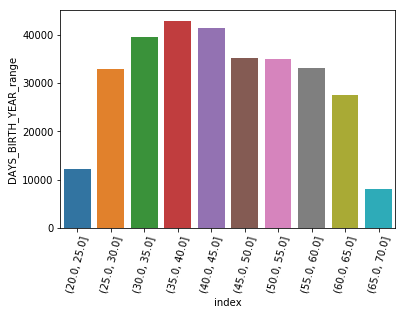

In [13]:
import seaborn as sns # 另一個繪圖-樣式套件
sns.barplot(p['index'],p['DAYS_BIRTH_YEAR_range'])
plt.xticks(rotation=75)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


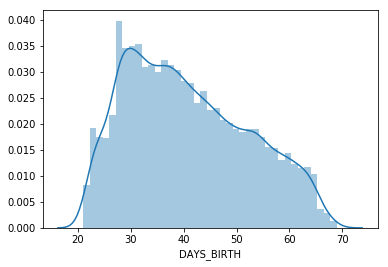

In [14]:
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

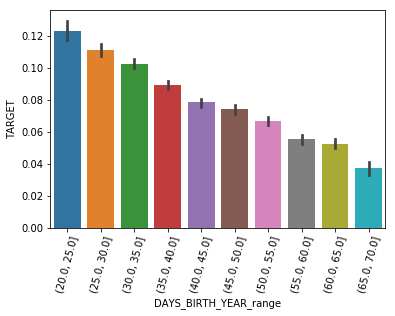

In [15]:
sns.barplot(app_train['DAYS_BIRTH_YEAR_range'],app_train['TARGET'])
plt.xticks(rotation=75)

In [18]:
app_train.groupby('DAYS_BIRTH_YEAR_range')['TARGET'].mean()

DAYS_BIRTH_YEAR_range
(20.0, 25.0]    0.123036
(25.0, 30.0]    0.111436
(30.0, 35.0]    0.102814
(35.0, 40.0]    0.089414
(40.0, 45.0]    0.078491
(45.0, 50.0]    0.074171
(50.0, 55.0]    0.066968
(55.0, 60.0]    0.055314
(60.0, 65.0]    0.052737
(65.0, 70.0]    0.037270
Name: TARGET, dtype: float64

In [38]:
app_train.groupby('DAYS_BIRTH_YEAR_range')['TARGET'].size()
app_train.DAYS_BIRTH_YEAR_range.value_counts().reset_index()

,index,DAYS_BIRTH_YEAR_range
0,"(35.099, 39.959]",41758
1,"(39.959, 44.819]",40350
2,"(30.238, 35.099]",38430
3,"(44.819, 49.679]",34311
4,"(49.679, 54.54]",33544
5,"(25.378, 30.238]",33127
6,"(54.54, 59.4]",32650
7,"(59.4, 64.26]",27685
8,"(20.469, 25.378]",13679
9,"(64.26, 69.121]",11977
